## 作業
1. 請用 numpy 建立一個 10 x 10, 數值分布自 -1.0 ~ 1.0 的矩陣並繪製 Heatmap
2. 請用 numpy 建立一個 1000 x 3, 數值分布為 -1.0 ~ 1.0 的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)
3. 請用 numpy 建立一個 1000 x 3, 數值分布為常態分佈的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)

# [作業目標]
- 試著設定隨機資料, 並依照範例練習基礎與進階的 Heatmap

# [作業重點]
- 如題1.條件隨機矩陣, 並仿造基礎 Heatmap 範例作圖   
(In[2], OUT[2]) (Hint : numpy.random.random - 均勻分布, 隨機小數)
- 如題2.3.條件隨機數值列, 並仿造進階 Heatmap 範例作圖  
(In[3], OUT[3], In[4], OUT[4]) (Hint : numpy.random.randn - 常態分布)

# [參考資料]
- [Heatmap](https://matplotlib.org/gallery/images_contours_and_fields/image_annotated_heatmap.html):matplotlib 官方介紹 Heatmap 有哪些參數可變化與調整，提供同學做圖形參數調整參考
- [進階 Heatmap](https://www.jianshu.com/p/363bbf6ec335):如果對於 matplotlib 的 Heatmap 不滿意．那麼不妨試試看 Seaborn 的進階版 Heatmap，同樣地，本連結僅供同學參考圖形範例並挑選對應程式，並不需要逐行讀完
- [Pairplot 的更多應用實例](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166):Seaborn 的 Pairplot 也能提供不少直覺，尤其是分類問題比回歸問題更為適用，如右圖，可以更容易看出該如何分類
- [seaborn.heatmap整理](https://zhuanlan.zhihu.com/p/35494575)

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
plt.style.use('ggplot')

# 忽略警告訊息
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

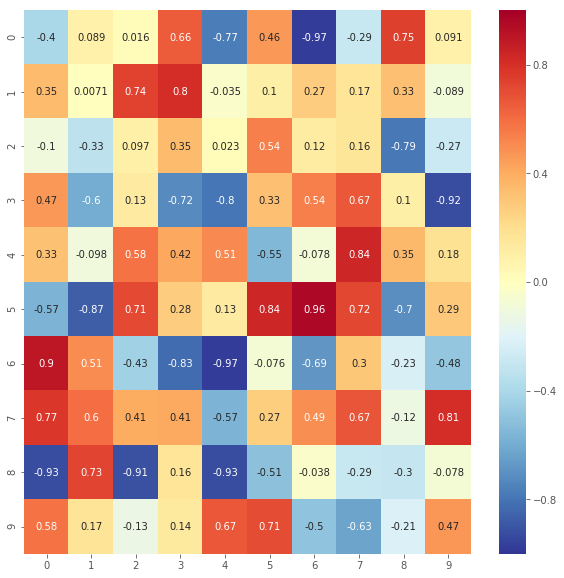

In [2]:
"""
Your Code Here
"""
matrix = np.random.rand(10, 10)*2 - 1
plt.figure(figsize=(10,10))
"""
Your Code Here
"""
#cmap:matplotlib颜色表名称或对象，或颜色列表，可选从数据值到色彩空间的映射。如果没有提供，默认设置
#annot: True表示把值帶入方格中
heatmap = sns.heatmap(matrix, cmap = plt.cm.RdYlBu_r, vmin = -1, vmax = 1 , annot = True)
plt.show()

- [np.random.choice](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html?highlight=random%20choice#numpy.random.choice):Generates a random sample from a given 1-D array
- [pd.reset_index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html):Reset the index, or a level of it.

   index         0         1         2
0      2  0.991325  0.926185 -0.404365
1      0  0.200007 -0.815316  0.169106
2      0  0.422701  0.949566 -0.373763
3      2 -0.649483 -0.257837 -0.558958
4      0 -0.080366 -0.922185  0.905217


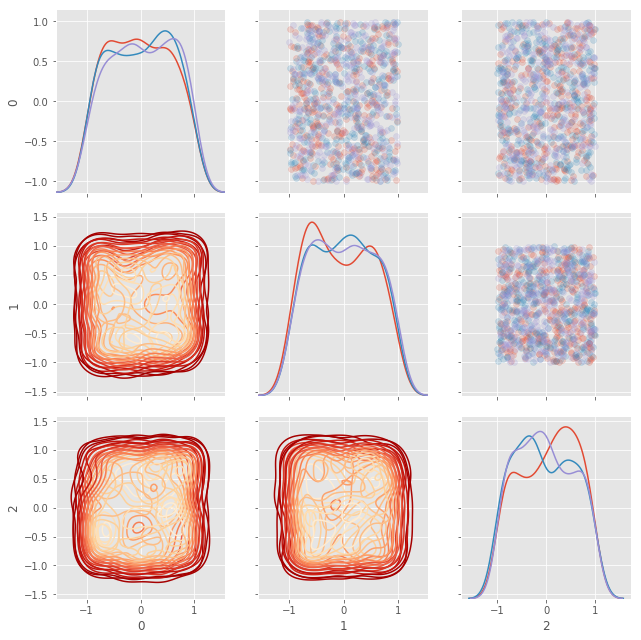

In [4]:
nrow = 1000
ncol = 3
"""
Your Code Here
"""
matrix = np.random.rand(nrow, ncol)*2 - 1

# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow)
plot_data = pd.DataFrame(matrix, indice).reset_index()
print(plot_data.head())
# 繪製 seborn 進階 Heatmap
# var:選擇要話的變數

grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=True, 
                    hue = 'index', vars = [x for x in list(plot_data.columns) if x != 'index'])
"""
Your Code Here
Please replace "..." to correct plot function
"""
grid.map_upper(plt.scatter , alpha = 0.2)
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot , cmap = plt.cm.OrRd_r)

plt.show()

   index         0         1         2
0      0  0.114857  0.533304 -0.497320
1      0 -0.627496  0.665607 -0.433850
2      1 -0.514506  1.265427  0.107716
3      0 -0.711501 -0.116945 -0.297584
4      0  0.842787 -0.341418 -0.553984


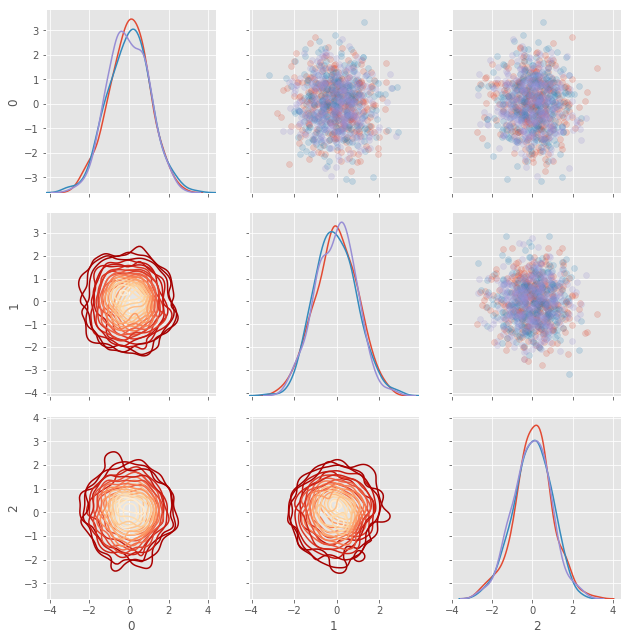

In [5]:
nrow = 1000
ncol = 3
"""
Your Code Here
"""
matrix = np.random.randn(nrow, ncol)

# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow)
plot_data = pd.DataFrame(matrix, indice).reset_index()
print(plot_data.head())
# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'index', vars = [x for x in list(plot_data.columns) if x != 'index'])
"""
Your Code Here
Please replace "..." to correct plot function
"""
grid.map_upper(plt.scatter , alpha = 0.2)
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot , cmap = plt.cm.OrRd_r)

plt.show()